## Géneration  d'un Corpus de fréquence

Dans cette partie on s'intéresse à la génération d'un Corpus de fréquence utile pour l'entraînement du réseau. On étudie aussi la création d'un fichier son .wav.

### Lecture du fichier de fréquence

Le fichiers Octaves.txt regroupes toutes les fréquences associées au notes d'un piano sur une plage d'octave -1 jusqu'a l'octave 9. Une lecture du fichier permet de générer une liste des fréquences. La liste des fréquences est donc un tableau facile à manipuler sous python.

In [30]:
def read_octaves(filename = "Octaves.txt"):
    fileOctave = open("Octaves.txt", "r")
    lines  = fileOctave.readlines()
    fileOctave.close()

    Octaves = []

    for line in lines:
        if "OCTAVE" not in line:
            Octaves.append(float(line))
    return Octaves
    
Octaves = read_octaves()
print(Octaves)

[16.3, 17.3, 18.3, 19.4, 20.5, 21.8, 23.1, 24.5, 26.0, 27.5, 29.1, 30.8, 32.7, 34.6, 36.7, 38.9, 41.2, 43.6, 46.2, 49.0, 51.9, 55.0, 58.0, 62.0, 65.0, 69.0, 74.0, 78.0, 83.0, 87.0, 92.5, 98.0, 104.0, 110.0, 117.0, 123.0, 131.0, 139.0, 147.0, 156.0, 165.0, 175.0, 185.0, 196.0, 208.0, 220.0, 233.0, 247.0, 262.0, 277.0, 294.0, 311.0, 330.0, 349.0, 370.0, 392.0, 415.0, 440.0, 466.0, 494.0, 523.0, 554.0, 587.0, 622.0, 659.0, 698.5, 740.0, 784.0, 831.0, 880.0, 932.0, 988.0, 1046.5, 1109.0, 1175.0, 1244.5, 1318.5, 1397.0, 1480.0, 1568.0, 1661.0, 1760.0, 1865.0, 1975.0, 2093.0, 2217.0, 2349.0, 2489.0, 2637.0, 2794.0, 2960.0, 3136.0, 3322.0, 3520.0, 3729.0, 3951.0, 4186.0, 4435.0, 4698.0, 4978.0, 5274.0, 5588.0, 5920.0, 6272.0, 6645.0, 7040.0, 7458.0, 7902.0, 8372.0, 8870.0, 9396.0, 9956.0, 10548.0, 11176.0, 11840.0, 12544.0, 13290.0, 14080.0, 14918.0, 15804.0, 16744.0, 17740.0, 18792.0, 19912.0, 21098.0]


### Essai de génération des ondes sonores associer à une octave

Pour générer les ondes sonores d'une octave, il suffit de créer à l'aide d'un sinus un vecteur.

In [25]:
#Génération d'une Octave
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Octave = []

for i in range(0,12):
    Octave.append(Octaves[i])

# Paramètre temporelle de chaque note
note_duration = 0.4
note_nbpoint = 5000
duration = note_duration*len(Octave)
nbpoint = note_nbpoint*len(Octave)

# Géneration de la base de temps
ones = np.ones(note_nbpoint)
t = np.linspace(0, note_duration, note_nbpoint, endpoint=False)
time = np.linspace(0, note_duration*len(Octave), note_nbpoint*len(Octave), endpoint=False)

#Paramètres de normalisation
freq_min = 16.3
freq_max = 21098

freq = [] #Signal de fréquence entrée

sig = [] #Onde sonore générée

for freq_note in Octave:
    
    freq_tmp = freq_note*ones/(freq_max-freq_min)# Normalisation de la fréquence
    freq = np.concatenate((freq, freq_tmp)) # Normalisation de la fréquence
    
    sig_tmp = np.sin(2*np.pi*freq_note*t) #génération d'une onde sonore pour une note
    sig = np.concatenate((sig, sig_tmp)) #génération de l'onde sonore finale
    


Affichage du signal en entrée

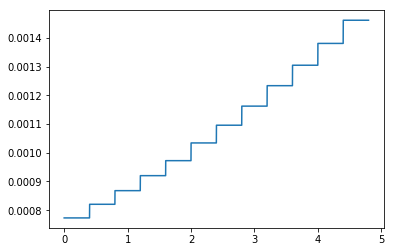

In [26]:
plt.plot(time, freq)

Affichage de l'onde sonore obtenue

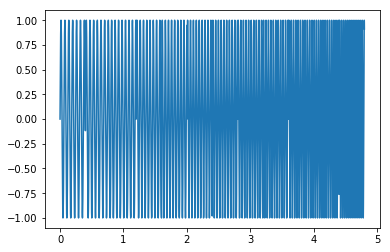

In [27]:
plt.plot(time, sig)

Définition d'un fonction de génération des fichiers .wav à partir de la list sig

In [28]:
from scipy.io.wavfile import write
def wav_generator(sig, name):
    song =  np.int16(sig/np.max(np.abs(sig)) * 32767) #remise au bon format
    write(name, int(nbpoint/duration), song)

In [29]:
wav_generator(sig, 'Octave.wav')

### Géneration d'une suite aléatoire de notes

Définition d'un fonction génératrice d'une suite aléatoire de notes (fréquences) et de son onde sonore associée

In [46]:
from random import randint

def note_generator(nb_note = 10, note_duration = 0.4, note_nbpoint = 5000, filename = "Octaves.txt"):
    #Création de la liste 
    Octaves = read_octaves(filename)
    
    # Géneration de la base de temps
    duration = note_duration*nb_note
    nbpoint = note_nbpoint*nb_note
    ones = np.ones(note_nbpoint)
    t = np.linspace(0, note_duration, note_nbpoint, endpoint=False)
    time = np.linspace(0, note_duration*nb_note, note_nbpoint*nb_note, endpoint=False)

    #Paramètres de normalisation
    freq_min = 16.3
    freq_max = 21098

    freq = [] #Signal de fréquence entrée

    sig = [] #Onde sonore générée
    
    for i in range(nb_note):
       
        
        freq_note = Octaves[randint(0,len(Octaves)-1)] #Choix aléatoire d'une note
        
        freq_tmp = freq_note*ones/(freq_max-freq_min)# Normalisation de la fréquence
        freq = np.concatenate((freq, freq_tmp)) # Normalisation de la fréquence

        sig_tmp = np.sin(2*np.pi*freq_note*t) #génération d'une onde sonore pour une note
        sig = np.concatenate((sig, sig_tmp)) #génération de l'onde sonore finale
    return (time, freq, sig)
    

Test de la fonction et écriture d'un fichier .wav

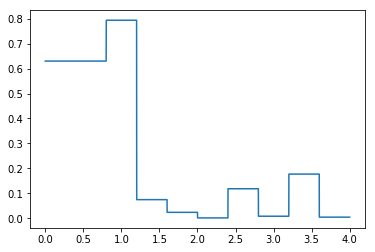

In [55]:
time, freq, sig = note_generator()
wav_generator(sig, "randomSong.wav")
plt.plot(time, freq)

Visualisation du son généré

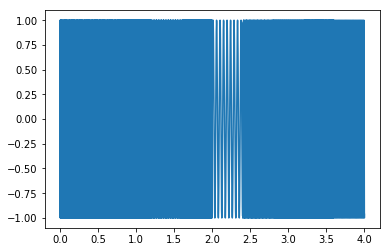

In [56]:
plt.plot(time, sig)

## Prise en main de la classe ESN

L'objectif de cette partie est d'essayer de comprendre la classe ESN à l'aide de l'exemple fournit sur la série chaotique, et les 

In [1]:
import sys
sys.version
import numpy as np
import matplotlib.pyplot as plt
import ESN

In [6]:

## load the data and select which parts are used for 'warming', 'training' and 'testing' the reservoir
# 30 seems to be enough for initLen with leak_rate=0.3 and reservoir size (resSize) = 300
initLen = 100 # number of time steps during which internal activations are washed-out during training
# we consider trainLen including the warming-up period (i.e. internal activations that are washed-out when training)
trainLen = initLen + 1900 # number of time steps during which we train the network
testLen = 2000 # number of time steps during which we test/run the network
N=100
n_inputs = 1
input_bias = True # add a constant input to 1
n_outputs = 1
n_reservoir = 300 # number of recurrent units
leak_rate = 0.3 # leaking rate (=1/time_constant_of_neurons)
spectral_radius = 1.25 # Scaling of recurrent matrix
input_scaling = 1. # Scaling of input matrix
proba_non_zero_connec_W = 0.2 # Sparsity of recurrent matrix: Perceptage of non-zero connections in W matrix
proba_non_zero_connec_Win = 1. # Sparsity of input matrix
proba_non_zero_connec_Wfb = 1. # Sparsity of feedback matrix
regularization_coef =  1e-8 #None # regularization coefficient, if None, pseudo-inverse is use instead of ridge regression
# out_func_activation = lambda x: x

In [7]:
import mat_gen
W = mat_gen.generate_internal_weights(N=N, spectral_radius=1.0, proba=1.0, Wstd=1.0) # Normal distribution with mean 0 and standard deviation 0
Win = mat_gen.generate_input_weights(nbr_neuron=N, dim_input=n_inputs, input_scaling=1.0, proba=1.0, input_bias=input_bias)

In [8]:
reservoir = ESN.ESN(lr=leak_rate, W=W, Win=Win, input_bias=input_bias, ridge=regularization_coef, Wfb=None, fbfunc=None)

In [9]:
data = np.loadtxt('MackeyGlass_t17.txt')
train_in = data[None,0:trainLen].T # input data (TRAINING PHASE)
train_out = data[None,0+1:trainLen+1].T # output to be predicted (TRAINING PHASE)
test_in = data[None,trainLen:trainLen+testLen].T # input data (TESTING PHASE)
test_out = data[None,trainLen+1:trainLen+testLen+1].T # output to be predicted (TESTING PHASE)

In [10]:
internal_trained = reservoir.train(inputs=[train_in,], teachers=[train_out,], wash_nr_time_step=100)

[array([[ 0.89867087,  0.90555585,  0.9119903 , ...,  0.93080342,
         0.93459822,  0.93835482],
       [ 0.61463415,  0.6036694 ,  0.59456286, ...,  0.60066711,
         0.59821942,  0.59595544],
       [-0.59025806, -0.57114718, -0.55303169, ..., -0.5259581 ,
        -0.51443529, -0.50128724],
       ...,
       [-0.1152253 , -0.17239552, -0.23085994, ..., -0.43811513,
        -0.47532732, -0.51167764],
       [-0.26844183, -0.24345955, -0.21987993, ..., -0.17993965,
        -0.16627351, -0.15174032],
       [ 0.90710223,  0.8933569 ,  0.87713284, ...,  0.80268944,
         0.78163979,  0.7579634 ]])]
[array([[-0.09351762, -0.14571328, -0.19540772, ..., -0.30151187,
        -0.33570312, -0.36746866]])]


In [11]:
output_pred, internal_pred = reservoir.run(inputs=[test_in,], reset_state=False)


In [12]:
print("\nRoot Mean Squared error:")
print(np.sqrt(np.mean((output_pred[0] - test_out)**2))/testLen)


Root Mean Squared error:
2.587560191673702e-07


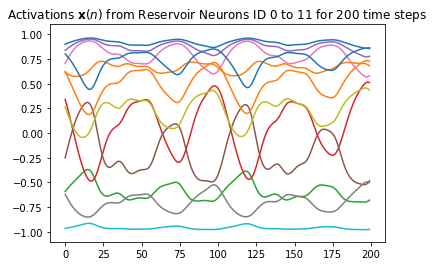

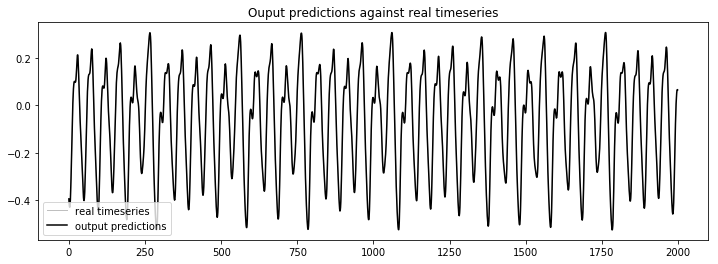

In [13]:
## Plot internal states of the ESN
plt.figure()
plt.plot( internal_trained[0][:200,:12])
plt.ylim([-1.1,1.1])
plt.title('Activations $\mathbf{x}(n)$ from Reservoir Neurons ID 0 to 11 for 200 time steps')

## Plot the predicted output with the real one.
plt.figure(figsize=(12,4))
plt.plot(test_out,  color='0.75', lw=1.0)
plt.plot(output_pred[0], color='0.00', lw=1.5)
plt.title("Ouput predictions against real timeseries")
plt.legend(["real timeseries", "output predictions"])
# plt.ylim(-1.1,1.1)
plt.show()